In [84]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data_test = pd.read_csv("test.csv")
data_train = pd.read_csv("train.csv")
data = data_train.append(data_test)

In [86]:
print(f"Розмір даних train {data_train.shape}")
print(f"Розмір даних test {data_test.shape}")

data_train.head ()

Розмір даних train (891, 12)
Розмір даних test (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
data_test.head ()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
#перевірка на нуль
def count_missing(df):
    mis_val = df.isnull().sum()
    mis_percent = 100*mis_val/(len(df))
    result_table = pd.DataFrame(
        {
            "Missing values": mis_val,
            "% of all values": mis_percent
        }).sort_values("% of all values", ascending=False).round(1)
    return result_table

In [89]:
count_missing(data_train)

,Missing values,% of all values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [90]:
count_missing(data_test)

,Missing values,% of all values
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


In [74]:
#перевірка на дублікати
data[data.duplicated()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [75]:
features = ["Age","Embarked","Pclass","Sex","SibSp","Parch","Fare","Name"]
y = data_train["Survived"]
reduced_data_train = data_train[features]
reduced_data_test = data_test[features]

In [76]:
#Заполнение нулевых значений столбцов возраста средними значениями
reduced_data_train[["Age"]] = reduced_data_train[["Age"]].fillna(value=reduced_data_train[["Age"]].mean())
#Саутгемптон - главный порт посадки. Итак, мы заполняем нулевые значения буквой S
reduced_data_train["Embarked"].fillna(value="S", inplace = True)
reduced_data_test[["Age","Fare"]] = reduced_data_test[["Age","Fare"]].fillna(value=reduced_data_test[["Age","Fare"]].mean())

In [77]:
print(reduced_data_train.isnull().sum().sort_values(ascending=False)/len(data)*100)

Name        0.0
Fare        0.0
Parch       0.0
SibSp       0.0
Sex         0.0
Pclass      0.0
Embarked    0.0
Age         0.0
dtype: float64


In [78]:
print(reduced_data_test.isnull().sum().sort_values(ascending=False)/len(data)*100)

Name        0.0
Fare        0.0
Parch       0.0
SibSp       0.0
Sex         0.0
Pclass      0.0
Embarked    0.0
Age         0.0
dtype: float64


In [79]:
#шукаємо категоріальні дані
reduced_data_train.dtypes

Age         float64
Embarked     object
Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Name         object
dtype: object

In [80]:
reduced_data_train.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

Embarked      3
Sex           2
Name        891
dtype: int64

In [81]:
reduced_data_test.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

Embarked      3
Sex           2
Name        418
dtype: int64

In [82]:
#виділити імена як категоріальні, замінивши на скорочення
Title_Dictionary = {
    "Capt": "Сrew",
    "Col": "Сrew",
    "Major": "Сrew",
    "Jonkheer": "VIP",
    "Don": "VIP",
    "Sir" : "VIP",
    "Dr": "Сrew",
    "Rev": "Сrew",
    "the Countess":"VIP",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "VIP"
}

def get_titles(combined):
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    combined['Title'] = combined.Title.map(Title_Dictionary)
    return combined

In [83]:
reduced_data_train = get_titles(reduced_data_train)
reduced_data_test = get_titles(reduced_data_test)
del reduced_data_train['Name']
del reduced_data_test['Name']

reduced_data_test.head()

,Age,Embarked,Pclass,Sex,SibSp,Parch,Fare,Title
0,34.5,Q,3,male,0,0,7.8292,Mr
1,47.0,S,3,female,1,0,7.0000,Mrs
2,62.0,Q,2,male,0,0,9.6875,Mr
3,27.0,S,3,male,0,0,8.6625,Mr
4,22.0,S,3,female,1,1,12.2875,Mrs


In [51]:
reduced_data_train.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

Embarked    3
Sex         2
Title       6
dtype: int64

In [52]:
reduced_data_test.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

Embarked    3
Sex         2
Title       5
dtype: int64

In [53]:
reduced_data_train["Embarked"] = reduced_data_train["Embarked"].astype('category').cat.codes
reduced_data_test["Embarked"] = reduced_data_test["Embarked"].astype('category').cat.codes
reduced_data_train = pd.get_dummies(reduced_data_train)
reduced_data_test = pd.get_dummies(reduced_data_test)

reduced_data_train.head()

,Age,Embarked,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_VIP,Title_Сrew
0,22.0,2,3,1,0,7.2500,0,1,0,0,1,0,0,0
1,38.0,0,1,1,0,71.2833,1,0,0,0,0,1,0,0
2,26.0,2,3,0,0,7.9250,1,0,0,1,0,0,0,0
3,35.0,2,1,1,0,53.1000,1,0,0,0,0,1,0,0
4,35.0,2,3,0,0,8.0500,0,1,0,0,1,0,0,0


In [54]:
X = reduced_data_train

<Figure size 864x864 with 0 Axes>

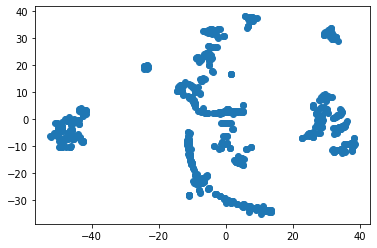

<Figure size 864x864 with 0 Axes>

In [55]:
#t-SNE і k-means
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X)

tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(train_scaled)

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])
plt.figure(figsize=(12, 12))

In [56]:
X = tsne_representation.astype(float)

In [57]:
def kmeans_cluster(max_it, n_in, tolerance):
  kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=max_it,
    n_clusters=2, n_init=n_in,
    random_state=None, tol=tolerance, verbose=0)
  kmeans.fit(X)
  return kmeans.labels_

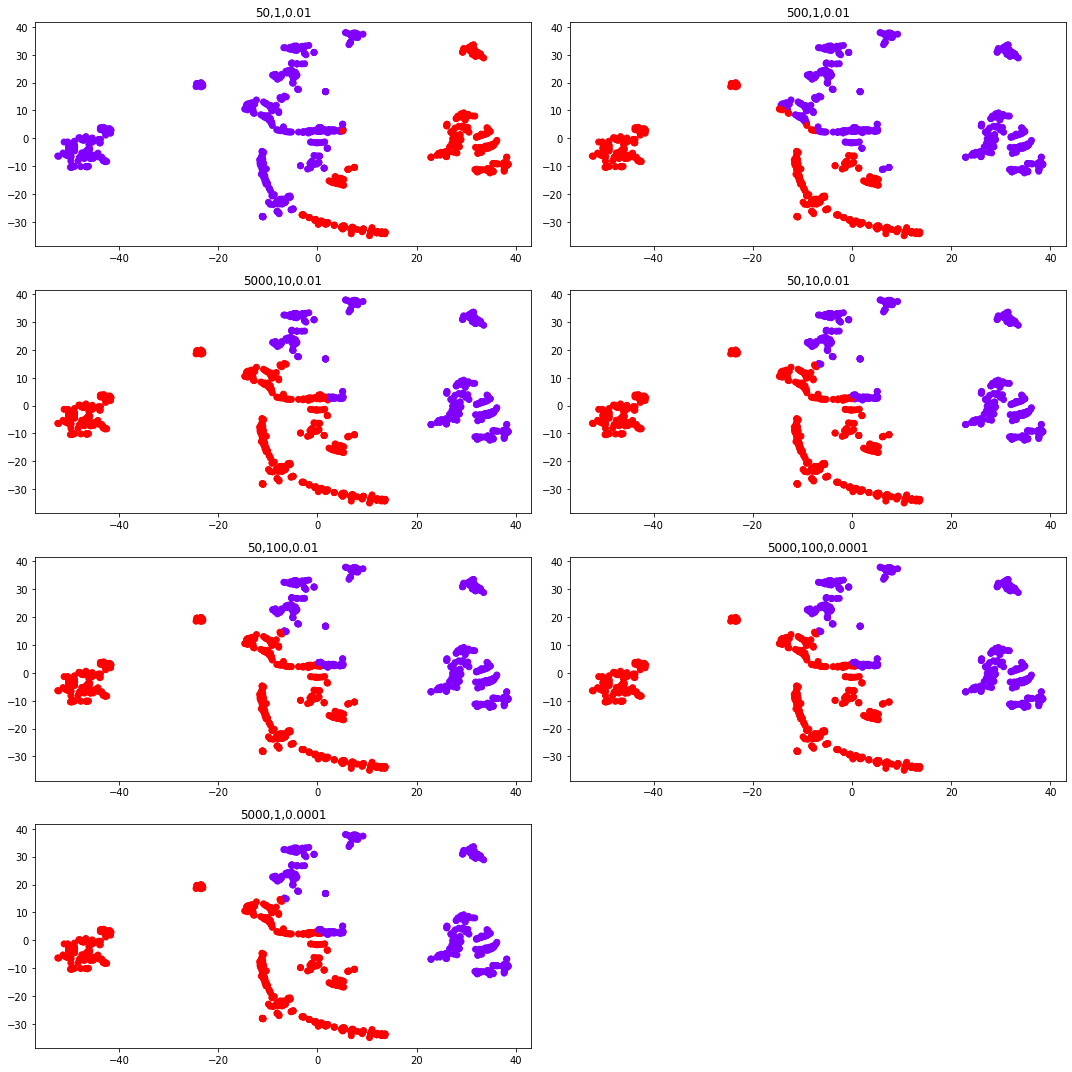

In [66]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplot(4, 2, 1)

result = kmeans_cluster(50,1,0.01)
plt.title('50,1,0.01')
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

plt.subplot(4, 2, 2)
result = kmeans_cluster(500,1,0.01)
plt.title('500,1,0.01')
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

plt.subplot(4, 2, 3)
result = kmeans_cluster(5000,1,0.01)
plt.title('5000,10,0.01')
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

plt.subplot(4, 2, 4)
plt.title('50,10,0.01')
result = kmeans_cluster(50,10,0.01)
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

plt.subplot(4, 2, 5)
plt.title('50,100,0.01')
result = kmeans_cluster(50,100,0.01)
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

plt.subplot(4, 2, 6)
plt.title('5000,100,0.0001')
result = kmeans_cluster(5000,100,0.0001)
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

plt.subplot(4, 2, 7)
plt.title('5000,1,0.0001')
result = kmeans_cluster(5000,1,0.0001)
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

fig.tight_layout()


plt.show()

<Figure size 864x864 with 0 Axes>

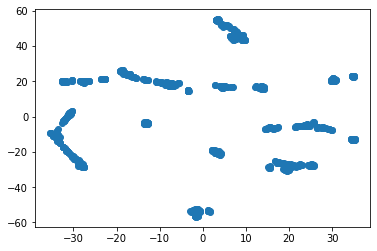

<Figure size 864x864 with 0 Axes>

In [59]:
#t-SNE і hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

train_full = X[:]
train_full = np.column_stack([train_full, y])

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_full)

tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(train_scaled)

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])
plt.figure(figsize=(12, 12))

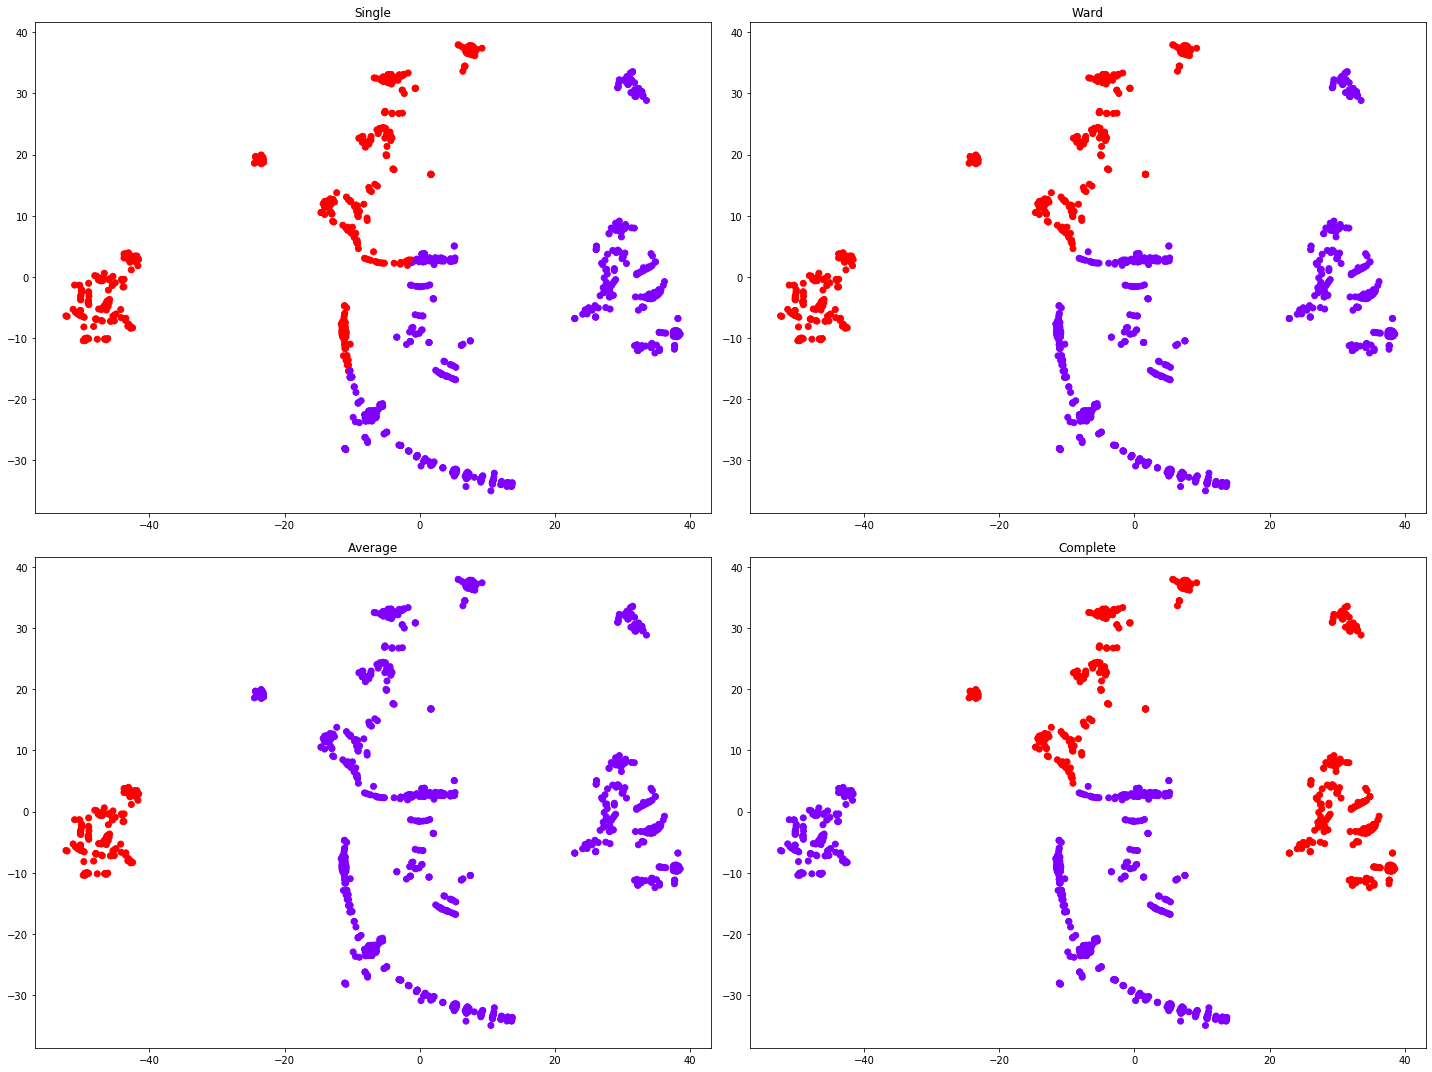

In [65]:
def agl_cluster(link):
 cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=link)
 cluster.fit(X)
 return cluster.labels_

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)
plt.subplot(2, 2, 1)


plt.title("Single")
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

plt.subplot(2, 2, 2)
result = agl_cluster('ward')
plt.title("Ward")
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

plt.subplot(2, 2, 3)
plt.title("Average")
result = agl_cluster('average')
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

plt.subplot(2, 2, 4)
plt.title("Complete")
result = agl_cluster('complete')
plt.scatter(X[:,0],X[:,1], c=result, cmap='rainbow')

fig.tight_layout()

plt.show()

<Figure size 864x864 with 0 Axes>

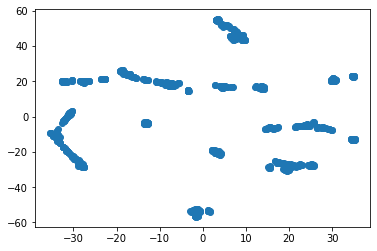

<Figure size 864x864 with 0 Axes>

In [61]:
#t-SNE і dbscan
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

train_full = X[:]
train_full = np.column_stack([train_full, y])

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_full)

tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(train_scaled)

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])
plt.figure(figsize=(12, 12))

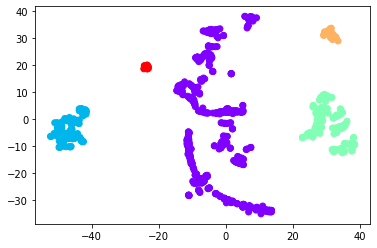

In [62]:
db = DBSCAN(eps=10, min_samples=2)
db.fit(X)
plt.scatter(X[:,0],X[:,1], c=db.labels_, cmap='rainbow')

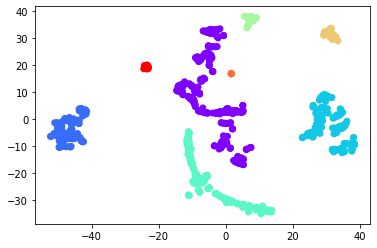

In [63]:
db = DBSCAN(eps=5, min_samples=2)
db.fit(X)
plt.scatter(X[:,0],X[:,1], c=db.labels_, cmap='rainbow')